In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('bank-additional/bank-additional-full.csv')
data.head()

In [ ]:
label = ['age','job',"marital","education","default","housing","loan","contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]
for i in data:
    value = data[i][:].str.split(';')

for i in range(len(value)):
    for j in range(len(value[i])):
        if '"' in value[i][j]:
            value[i][j] = value[i][j][1:-1]

In [ ]:
temp = []
for index in range(len(value)):
    index = pd.DataFrame({label[i]: [value[index][i]] for i in range(len(label))})
    temp.append(index)

result = pd.concat(temp, ignore_index=True)

In [ ]:
result.head()

In [ ]:
result.to_csv('original_data.csv')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20)) 
corr = data.corr()
h1 = sns.heatmap(corr, square=True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm')

In [ ]:
from matplotlib import pyplot as plt
#
df1 = data.y.value_counts().plot(figsize = (5,5),kind='pie',legend= True,title='CRM Term Deposit',fontsize=15,autopct='%.2f')


# Find outlier

In [134]:
import pandas as pd

data = pd.read_csv('original_data.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [2]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['y']= le.fit_transform(data['y'])

In [4]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

f1 = sns.boxplot(data['duration'])
f1.figure.set_size_inches(8,5)
plt.show()

<Figure size 800x500 with 1 Axes>

In [5]:
q3 = np.percentile(data['duration'], [75])
q1 = np.percentile(data['duration'], [25])
iqr = q3 - q1

print("Upper_bound:", q3 + 1.5*iqr)
print("Lower_bound:", q1 - 1.5*iqr)

Upper_bound: [644.5]
Lower_bound: [-223.5]


# Pair of feature distribution

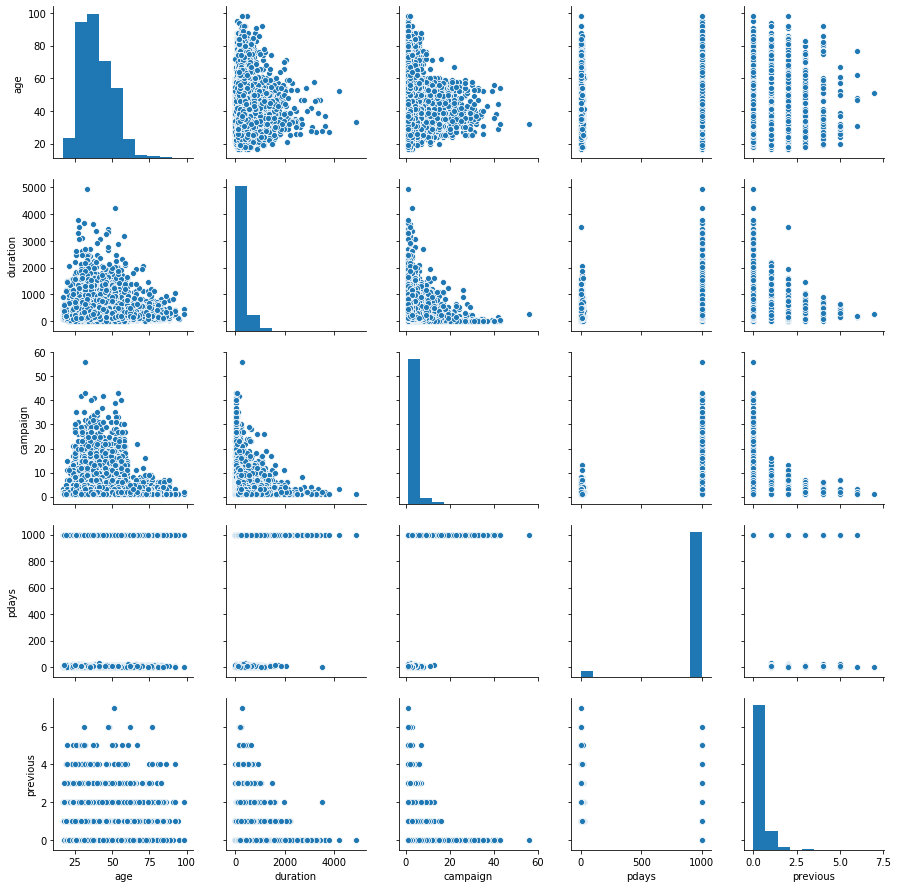

In [6]:
sns.pairplot(data.iloc[:,:15])

# Correlation map

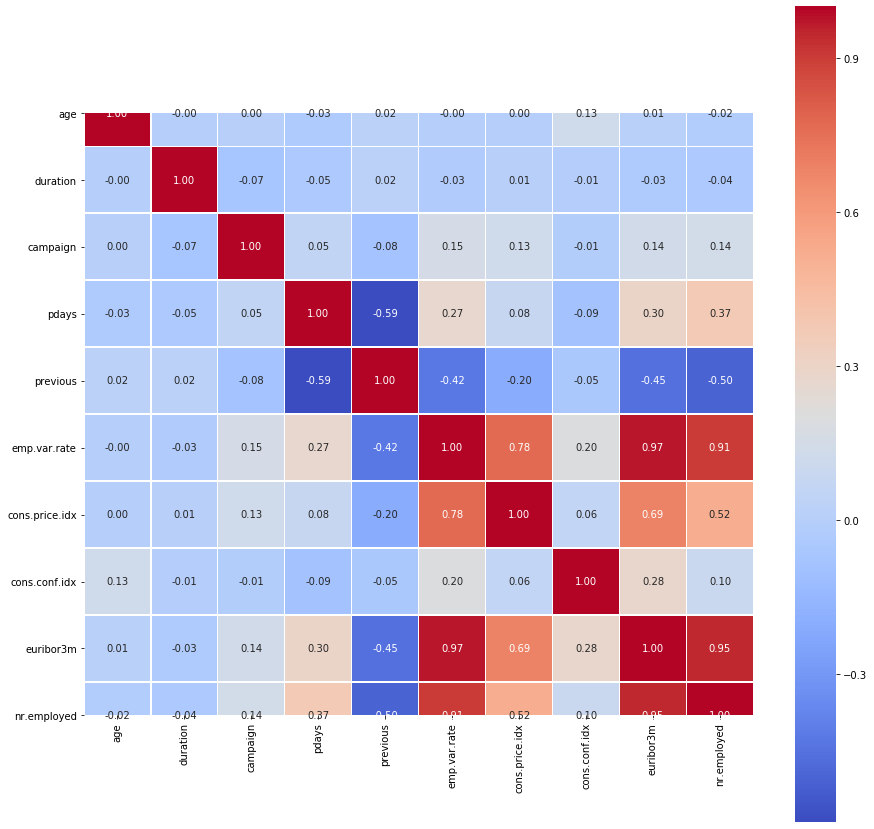

In [135]:
corr = data.corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(corr, square=True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm')

# Check missing value

In [137]:
import pandas as pd 

data = pd.read_csv('original_data.csv')
data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [138]:
missing_dict = {}
for col in data.columns:
    missing_dict[col] = 0
    for item in data[col]:
        if item == 'unknown':
            missing_dict[col] += 1

In [139]:
missing_dict

{'Unnamed: 0': 0,
 'age': 0,
 'job': 330,
 'marital': 80,
 'education': 1731,
 'default': 8597,
 'housing': 990,
 'loan': 990,
 'contact': 0,
 'month': 0,
 'day_of_week': 0,
 'duration': 0,
 'campaign': 0,
 'pdays': 0,
 'previous': 0,
 'poutcome': 0,
 'emp.var.rate': 0,
 'cons.price.idx': 0,
 'cons.conf.idx': 0,
 'euribor3m': 0,
 'nr.employed': 0,
 'y': 0}

# 1. Set missing data = unknown

In [140]:
udata = data.drop(['Unnamed: 0', 'duration', 'cons.price.idx', 'euribor3m', 'nr.employed'], axis = 1)

## Encoding categorial data and scaling numerical data

In [141]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split

le1 = LabelEncoder()
for label in udata.columns:
    udata[label]= le1.fit_transform(udata[label])

from sklearn.preprocessing import StandardScaler

for col in ['campaign', 'pdays', 'emp.var.rate', 'cons.conf.idx']:
    sc = StandardScaler(with_mean=True, with_std=True)
    udata[col] = sc.fit_transform(udata[col].values.reshape(-1,1))

In [13]:
ux = udata.drop('y', axis = 1)
uy = udata['y']

uX_train, uX_test, uY_train, uY_test = train_test_split(ux, uy, test_size = 0.2)

# 2. Using Decision Tree or Navie Bayes to impute missing value

In [14]:
pdata = pd.read_csv('original_data.csv')

In [15]:
pdata = pdata.drop(['Unnamed: 0', 'duration', 'cons.price.idx', 'euribor3m', 'nr.employed'], axis = 1)

In [16]:
col = pdata.columns.tolist()

## Encoding categorial data and scaling numerical data

In [17]:
from sklearn.preprocessing import LabelEncoder

le2 = LabelEncoder()
for label in pdata.columns:
    pdata[label]= le2.fit_transform(pdata[label])
    
from sklearn.preprocessing import StandardScaler

for i in ['campaign', 'pdays', 'emp.var.rate', 'cons.conf.idx']:
    sc = StandardScaler(with_mean=True, with_std=True)
    pdata[i] = sc.fit_transform(pdata[i].values.reshape(-1,1))

## 1) Predict job missing value

In [18]:
job_missing = []
job_index = []

for i, row in pdata.iterrows():
    if row[1] == 11:
        job_missing.append(row)
        job_index.append(i)

In [19]:
job_data = pdata.drop(job_index)

In [20]:
job_test = pd.DataFrame(job_missing, columns = col)
job_test = job_test.drop('job', axis = 1)

In [21]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

job_x = job_data.drop('job', axis = 1)
job_y = job_data['job']

X_train, X_test, Y_train, Y_test = train_test_split(job_x, job_y, test_size = 0.2)

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))


accuracy of DT: 0.45190895741556536
accuracy of NB: 0.3613558492413118


Since the predict accuracy is very low, we decide not to predict job missing value

## 2) Predict marital missing value

In [22]:
marital_missing = []
marital_index = []
for i, row in pdata.iterrows():
    if row[2] == 3:
        marital_missing.append(row)
        marital_index.append(i)

In [23]:
marital_data = pdata.drop(marital_index)

In [24]:
marital_test = pd.DataFrame(marital_missing, columns = col)
marital_test = marital_test.drop('marital', axis = 1)

In [25]:
marital_x = marital_data.drop('marital', axis = 1)
marital_y = marital_data['marital']
X_train, X_test, Y_train, Y_test = train_test_split(marital_x, marital_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.6183410362442228
accuracy of NB: 0.6182194113354414


Since navie bayes got an acceptable result, we use it to predict marital missing value

In [26]:
NB = GaussianNB()
NB.fit(marital_x, marital_y)

Y_pred3 = NB.predict(marital_test)

In [27]:
marital_test['marital'] = Y_pred3
pdata = pd.concat([marital_data, marital_test])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## 3) Predict education missing value

In [28]:
education_missing = []
education_index = []

for i, row in pdata.iterrows():
    if row[6] == 7:
        education_missing.append(row)
        education_index.append(i)

In [29]:
education_data = pdata.drop(education_index)

education_test = pd.DataFrame(education_missing, columns = col)
education_test = education_test.drop('education', axis = 1)

In [30]:
education_x = education_data.drop('education', axis = 1)
education_y = education_data['education']
X_train, X_test, Y_train, Y_test = train_test_split(education_x, education_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.48289406994424733
accuracy of NB: 0.339204257475925


Same as previous description, we don't predict education missing value

## 4) Predict default missing value

In [31]:
default_missing  = []
default_index = []

for i, row in pdata.iterrows():
    if row[5] == 1:
        default_missing.append(row)
        default_index.append(i)


In [32]:
default_data = pdata.drop(default_index)
default_test = pd.DataFrame(default_missing, columns = col)
default_test = default_test.drop('default', axis = 1)

In [33]:
default_x = education_data.drop('default', axis = 1)
default_y = education_data['default']
X_train, X_test, Y_train, Y_test = train_test_split(default_x, default_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.7529143436391282
accuracy of NB: 0.5046882919412062


Use Decision Tree to predict default missing value

In [34]:
DT = DecisionTreeClassifier()
DT.fit(default_x, default_y)
default_pred = DT.predict(default_test)


In [35]:
default_test['default'] = default_pred
pdata = pd.concat([default_data, default_test])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## 5) Predict housing missing value

In [36]:
housing_missing = []
housing_index = []
for i, row in pdata.iterrows():
    if row[8] == 1:
        housing_missing.append(row)
        housing_index.append(i)


In [37]:
housing_data = pdata.drop(housing_index)
housing_test = pd.DataFrame(housing_missing, columns = col)
housing_test = housing_test.drop('housing', axis = 1)

In [38]:
housing_x = housing_data.drop('housing', axis = 1)
housing_y = housing_data['housing']
X_train, X_test, Y_train, Y_test = train_test_split(housing_x, housing_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.5049751243781094
accuracy of NB: 0.5247512437810945


## 6) Predict loan missing value

In [39]:
loan_missing = []
loan_index = []
for i, row in pdata.iterrows():
    if row[10] == 1:
        loan_missing.append(row)
        loan_index.append(i)

In [40]:
loan_data = pdata.drop(loan_index)
loan_test = pd.DataFrame(loan_missing, columns = col)
loan_test = loan_test.drop('loan', axis = 1)

In [41]:
loan_x = loan_data.drop('loan', axis = 1)
loan_y = loan_data['loan']
X_train, X_test, Y_train, Y_test = train_test_split(loan_x, loan_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.735820895522388
accuracy of NB: 0.8493781094527363


In [42]:
NB = GaussianNB()
NB.fit(loan_x, loan_y)
loan_pred = NB.predict(loan_test)

In [43]:
loan_test['loan'] = loan_pred
pdata = pd.concat([loan_data, loan_test])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## 7) Predict poutcome missing value

In [44]:
poutcome_missing = []
poutcome_index = []
for i, row in pdata.iterrows():
    if row[14] == 1:
        poutcome_missing.append(row)
        poutcome_index.append(i)

In [45]:
poutcome_data = pdata.drop(poutcome_index)
poutcome_test = pd.DataFrame(poutcome_missing, columns = col)
poutcome_test = poutcome_test.drop('poutcome', axis = 1)

In [46]:
poutcome_x = poutcome_data.drop('poutcome', axis = 1)
poutcome_y = poutcome_data['poutcome']
X_train, X_test, Y_train, Y_test = train_test_split(poutcome_x, poutcome_y, test_size = 0.2)


DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

NB = GaussianNB()
NB.fit(X_train, Y_train)

Y_pred1 = NB.predict(X_test)
Y_pred2 = DT.predict(X_test)

print('accuracy of DT:', accuracy_score(Y_test, Y_pred2))
print('accuracy of NB:', accuracy_score(Y_test, Y_pred1))

accuracy of DT: 0.9786666666666667
accuracy of NB: 0.9653333333333334


In [47]:
DT = DecisionTreeClassifier()
DT.fit(poutcome_x, poutcome_y)
poutcome_pred = DT.predict(poutcome_test)

In [48]:
poutcome_test['poutcome'] = poutcome_pred
pdata = pd.concat([poutcome_data, poutcome_test])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [49]:
from sklearn.model_selection import train_test_split 

px = pdata.drop('y', axis = 1)
py = pdata['y']

pX_train, pX_test, pY_train, pY_test = train_test_split(px, py, test_size = 0.2)

# 3. Drop missing value

In [50]:
mdata = pd.read_csv('original_data.csv')

missing_list = []
for i in range(len(mdata.index)):
    if 'unknown' in mdata.iloc[i].values:
        missing_list.append(i)

In [51]:
mdata = mdata.drop(missing_list)
mdata = mdata.drop(['Unnamed: 0','duration','cons.price.idx', 'euribor3m', 'nr.employed', 'poutcome'], axis = 1)

In [52]:
from sklearn.preprocessing import LabelEncoder

le3 = LabelEncoder()
for label in mdata.columns:
    mdata[label]= le3.fit_transform(mdata[label])
    
from sklearn.preprocessing import StandardScaler

for i in ['campaign', 'pdays', 'emp.var.rate', 'cons.conf.idx']:
    sc = StandardScaler(with_mean=True, with_std=True)
    mdata[i] = sc.fit_transform(mdata[i].values.reshape(-1,1))

In [53]:
mx = mdata.drop('y', axis = 1)
my = mdata['y']

mX_train, mX_test, mY_train, mY_test = train_test_split(mx, my, test_size = 0.2)

# 1. Accuracy of unknown policy without using PCA

In [110]:
from sklearn.neural_network import MLPClassifier
import time 

start_time1 = time.time()

uml = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
uml.fit(uX_train, uY_train)

uy1 = uml.predict(uX_test)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

au1 = accuracy_score(uY_test, uy1)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', au1)

from sklearn.naive_bayes import GaussianNB

unb = GaussianNB()
unb.fit(uX_train, uY_train)

uy2 = unb.predict(uX_test)
au2 = accuracy_score(uY_test, uy2) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', au2)

from sklearn.svm import SVC 

usvm = SVC()
usvm.fit(uX_train, uY_train)

uy3 = usvm.predict(uX_test)
au3 = accuracy_score(uY_test, uy3)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',au3)

from sklearn.neighbors import KNeighborsClassifier

uknn = KNeighborsClassifier(n_neighbors=5)
uknn.fit(uX_train, uY_train)

uy4 = uknn.predict(uX_test)
au4 = accuracy_score(uY_test, uy4)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', au4)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

udt = DecisionTreeClassifier()
udt.fit(uX_train, uY_train)

uy5 = udt.predict(uX_test)
au5 = accuracy_score(uY_test, uy5) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', au5)

ut = time.time() - start_time1

accuracy of MLPNN: 0.896091284292304
accuracy of NB: 0.8476571983491139


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.8974265598446225
accuracy of KNN: 0.8918426802621996
accuracy of DT: 0.8319980577810148


In [111]:
ut

123.58374786376953

# 2. Accuracy of prediction policy without using PCA

In [112]:
from sklearn.neural_network import MLPClassifier

start_time2 = time.time()

pml = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
pml.fit(pX_train, pY_train)

py1 = pml.predict(pX_test)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

ap1 = accuracy_score(pY_test, py1)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', ap1)

from sklearn.naive_bayes import GaussianNB

pnb = GaussianNB()
pnb.fit(pX_train, pY_train)

py2 = pnb.predict(pX_test)
ap2 = accuracy_score(pY_test, py2) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', ap2)

from sklearn.svm import SVC 

psvm = SVC()
psvm.fit(pX_train, pY_train)

py3 = psvm.predict(pX_test)
ap3 = accuracy_score(pY_test, py3)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',ap3)

from sklearn.neighbors import KNeighborsClassifier

pknn = KNeighborsClassifier(n_neighbors=5)
pknn.fit(pX_train, pY_train)

py4 = uknn.predict(pX_test)
ap4 = accuracy_score(pY_test, py4)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', ap4)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

pdt = DecisionTreeClassifier()
pdt.fit(pX_train, pY_train)

py5 = pdt.predict(pX_test)
ap5 = accuracy_score(pY_test, py5) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', ap5)

pt = time.time() - start_time2

accuracy of MLPNN: 0.891964068948774
accuracy of NB: 0.8799465889779072


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.8923282350084972
accuracy of KNN: 0.8531196892449624
accuracy of DT: 0.840616654527798


In [113]:
pt

102.19658398628235

# 3. Accuracy of drop policy without using PCA

In [114]:
from sklearn.neural_network import MLPClassifier

start_time3 = time.time()

mml = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
mml.fit(mX_train, mY_train)

my1 = mml.predict(mX_test)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

am1 = accuracy_score(mY_test, my1)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', am1)

from sklearn.naive_bayes import GaussianNB

mnb = GaussianNB()
mnb.fit(mX_train, mY_train)

my2 = mnb.predict(mX_test)
am2 = accuracy_score(mY_test, my2) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', am2)

from sklearn.svm import SVC 

msvm = SVC()
msvm.fit(mX_train, mY_train)

my3 = msvm.predict(mX_test)
am3 = accuracy_score(mY_test, my3)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',am3)

from sklearn.neighbors import KNeighborsClassifier

mknn = KNeighborsClassifier(n_neighbors=5)
mknn.fit(mX_train, mY_train)

my4 = mknn.predict(mX_test)
am4 = accuracy_score(mY_test, my4)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', am4)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

mdt = DecisionTreeClassifier()
mdt.fit(mX_train, mY_train)

my5 = mdt.predict(mX_test)
am5 = accuracy_score(mY_test, my5) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', am5)

mt = time.time() - start_time3

accuracy of MLPNN: 0.8824204657264677
accuracy of NB: 0.7082650049196458


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.8845523122335192
accuracy of KNN: 0.874221056083962
accuracy of DT: 0.8233847163004264


In [115]:
mt

70.94508814811707

# Accuracy plot of three policy without using PCA

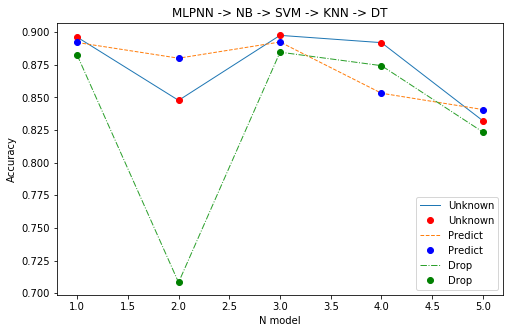

In [116]:
import matplotlib.pyplot as plt

x = [1, 2, 3 ,4 ,5 ]
y1 = [au1, au2, au3, au4, au5]
y2 = [ap1, ap2, ap3, ap4, ap5]
y3 = [am1, am2, am3, am4, am5]

plt.figure(figsize = (8, 5))
plt.plot(x,y1,"-",x,y1,"ro",linewidth=1, label = 'Unknown') 
plt.plot(x,y2,"--", x,y2,"bo",linewidth=1, label = 'Predict') 
plt.plot(x,y3,"-.",x,y3,"go",linewidth=1, label = 'Drop') 
plt.xlabel("N model") 
plt.ylabel("Accuracy") 
plt.title("MLPNN -> NB -> SVM -> KNN -> DT")  
plt.legend()
plt.show()  

From the comparison result, we can see using 'unknown' to replace missing value can get the highest result, 
however, using prediction method, it has the lowest deviation between each model
finally, directly dropping missing value cause the lowest accuracy

In [117]:
print(ut, pt, mt)

123.58374786376953 102.19658398628235 70.94508814811707


# Feature importance computing

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.21216126 0.09179604 0.0445443  0.07793642 0.01006918 0.03519291
 0.02776941 0.01615759 0.0368399  0.0874626  0.1175797  0.05928282
 0.01672857 0.03835003 0.07079857 0.0573307 ]


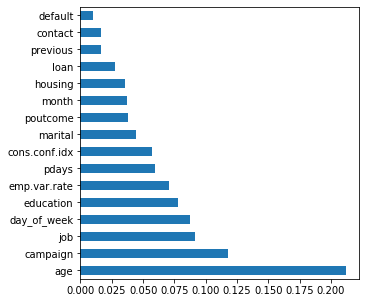

In [149]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

temp = udata.drop('y', axis = 1)
y = udata['y']
model = ExtraTreesClassifier()
model.fit(temp,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
plt.figure(figsize = (5, 5))
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=temp.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Accuracy of unknown policy with PCA = 5

In [118]:
from sklearn.decomposition import PCA

upca = PCA(n_components=5)
ud = upca.fit_transform(uX_train)
ut = upca.fit_transform(uX_test)

In [119]:
from sklearn.neural_network import MLPClassifier

start_time4 = time.time()

uml1 = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
uml1.fit(ud, uY_train)

uy11 = uml1.predict(ut)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

au11 = accuracy_score(uY_test, uy11)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', au11)

from sklearn.naive_bayes import GaussianNB

unb1 = GaussianNB()
unb1.fit(ud, uY_train)

uy21 = unb1.predict(ut)
au21 = accuracy_score(uY_test, uy21) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', au21)

from sklearn.svm import SVC 

usvm1 = SVC()
usvm1.fit(ud, uY_train)

uy31 = usvm1.predict(ut)
au31 = accuracy_score(uY_test, uy31)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',au31)

from sklearn.neighbors import KNeighborsClassifier

uknn1 = KNeighborsClassifier(n_neighbors=5)
uknn1.fit(ud, uY_train)

uy41 = uknn1.predict(ut)
au41 = accuracy_score(uY_test, uy41)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', au41)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

udt1 = DecisionTreeClassifier()
udt1.fit(ud, uY_train)

uy51 = udt1.predict(ut)
au51 = accuracy_score(uY_test, uy51) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', au51)

ut1 = time.time() - start_time4

accuracy of MLPNN: 0.8890507404709881
accuracy of NB: 0.8879582422918184


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.8877154649186696
accuracy of KNN: 0.8800679776644816
accuracy of DT: 0.7893906287933965


In [120]:
ut1

60.239622831344604

# Accuracy of predict policy with PCA = 5

In [121]:
from sklearn.decomposition import PCA

ppca = PCA(n_components=5)
pd = ppca.fit_transform(pX_train)
pt = ppca.fit_transform(pX_test)

In [122]:
from sklearn.neural_network import MLPClassifier

start_time5 = time.time() 

pml1 = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
pml1.fit(pd, pY_train)

py11 = pml1.predict(pt)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

ap11 = accuracy_score(pY_test, py11)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', ap11)

from sklearn.naive_bayes import GaussianNB

pnb1 = GaussianNB()
pnb1.fit(pd, pY_train)

py21 = pnb1.predict(pt)
ap21 = accuracy_score(pY_test, py21) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', ap21)

from sklearn.svm import SVC 

psvm1 = SVC()
psvm1.fit(pd, pY_train)

py31 = psvm1.predict(pt)
ap31 = accuracy_score(pY_test, py31)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',ap31)

from sklearn.neighbors import KNeighborsClassifier

pknn1 = KNeighborsClassifier(n_neighbors=5)
pknn1.fit(pd, pY_train)

py41 = pknn1.predict(pt)
ap41 = accuracy_score(pY_test, py41)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', ap41)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

pdt1 = DecisionTreeClassifier()
pdt1.fit(pd, pY_train)

py51 = pdt1.predict(pt)
ap51 = accuracy_score(pY_test, py51) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', ap51)

pt1 = time.time() - start_time5

accuracy of MLPNN: 0.8886865744112649
accuracy of NB: 0.8846807477543093


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.8854090798737557
accuracy of KNN: 0.8788540907987376
accuracy of DT: 0.7885409079873755


In [123]:
pt1

69.47187995910645

# Accuracy of drop policy with PCA = 5

In [124]:
from sklearn.decomposition import PCA

mpca = PCA(n_components=5)
md = mpca.fit_transform(mX_train)
mt = mpca.fit_transform(mX_test)

In [125]:
from sklearn.neural_network import MLPClassifier

start_time6 = time.time()

mml1 = MLPClassifier(activation = 'logistic', learning_rate = 'adaptive', max_iter = 1000, verbose = False)
mml1.fit(md, mY_train)

my11 = mml1.predict(mt)

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

am11 = accuracy_score(mY_test, my11)

#print(classification_report(uY_test, uy1))
#print(confusion_matrix(uY_test, uy1))
print('accuracy of MLPNN:', am11)

from sklearn.naive_bayes import GaussianNB

mnb1 = GaussianNB()
mnb1.fit(md, mY_train)

my21 = mnb1.predict(mt)
am21 = accuracy_score(mY_test,my21) 

#print(classification_report(uY_test, uy2))
#print(confusion_matrix(uY_test, uy2))
print('accuracy of NB:', am21)

from sklearn.svm import SVC 

msvm1 = SVC()
msvm1.fit(md, mY_train)

my31 = msvm1.predict(mt)
am31 = accuracy_score(mY_test, my31)

#print(classification_report(uY_test, uy3))
#print(confusion_matrix(uY_test, uy3))
print('accuracy of SVM:',am31)

from sklearn.neighbors import KNeighborsClassifier

mknn1 = KNeighborsClassifier(n_neighbors=5)
mknn1.fit(md, mY_train)

my41 = mknn1.predict(mt)
am41 = accuracy_score(mY_test, my41)

#print(classification_report(uY_test, uy4))
#print(confusion_matrix(uY_test, uy4))
print('accuracy of KNN:', am41)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

mdt1 = DecisionTreeClassifier()
mdt1.fit(md, mY_train)

my51 = mdt1.predict(mt)
am51 = accuracy_score(mY_test, my51) 

#print(classification_report(uY_test, uy5))
#print(confusion_matrix(uY_test, uy5))
print('accuracy of DT:', am51)

mt1 = time.time() - start_time6

accuracy of MLPNN: 0.8732371269268613
accuracy of NB: 0.8702853394555592


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy of SVM: 0.8738930796982617
accuracy of KNN: 0.865693670055756
accuracy of DT: 0.7705805182026894


In [126]:
mt1

50.05858087539673

# Accuracy plot of three policy with PCA

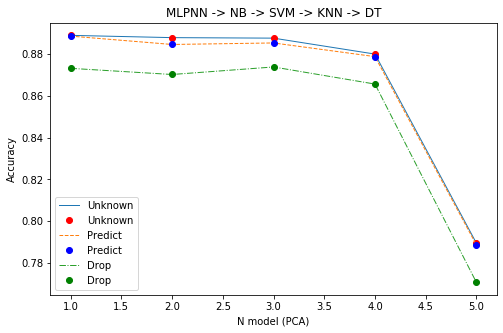

In [127]:
import matplotlib.pyplot as plt

x = [1, 2, 3 ,4 ,5 ]
y11 = [au11, au21, au31, au41, au51]
y21 = [ap11, ap21, ap31, ap41, ap51]
y31 = [am11, am21, am31, am41, am51]

plt.figure(figsize = (8, 5))
plt.plot(x,y11,"-",x,y11,"ro",linewidth=1, label = 'Unknown') 
plt.plot(x,y21,"--", x,y21,"bo",linewidth=1, label = 'Predict') 
plt.plot(x,y31,"-.",x,y31,"go",linewidth=1, label = 'Drop') 
plt.xlabel("N model (PCA)")   
plt.ylabel("Accuracy")   
plt.title("MLPNN -> NB -> SVM -> KNN -> DT")   
plt.legend()
plt.show()    

# PCA comparison

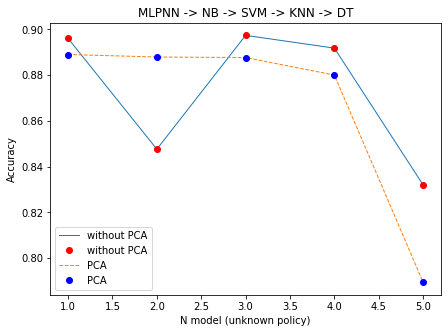

In [130]:
x1 = [1, 2, 3, 4, 5]
uwp = [au1, au2, au3, au4, au5]
up = [au11, au21, au31, au41, au51]

plt.figure(figsize = (7, 5))
plt.plot(x1,uwp,"-",x1,uwp,"ro",linewidth=1, label = 'without PCA') 
plt.plot(x1,up,"--", x1,up,"bo",linewidth=1, label = 'PCA') 

plt.xlabel("N model (unknown policy)")  
plt.ylabel("Accuracy")  
plt.title("MLPNN -> NB -> SVM -> KNN -> DT") 
plt.legend()
plt.show()  

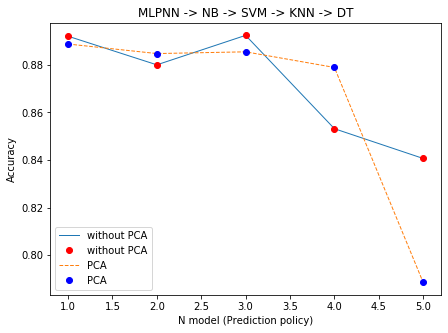

In [131]:
x2 = [1, 2, 3, 4, 5]
pwp = [ap1, ap2, ap3, ap4, ap5]
pp = [ap11, ap21, ap31, ap41, ap51]

plt.figure(figsize = (7, 5))
plt.plot(x2,pwp,"-",x2,pwp,"ro",linewidth=1, label = 'without PCA') 
plt.plot(x2,pp,"--", x2,pp,"bo",linewidth=1, label = 'PCA') 

plt.xlabel("N model (Prediction policy)") 
plt.ylabel("Accuracy")  
plt.title("MLPNN -> NB -> SVM -> KNN -> DT")
plt.legend()
plt.show()  

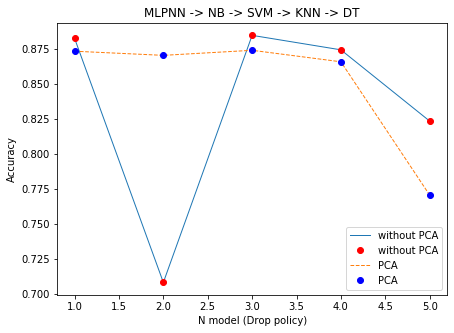

In [132]:
x3 = [1, 2, 3, 4, 5]
mwp = [am1, am2, am3, am4, am5]
mp = [am11, am21, am31, am41, am51]

plt.figure(figsize = (7, 5))
plt.plot(x3,mwp,"-",x3,mwp,"ro",linewidth=1, label = 'without PCA') 
plt.plot(x3,mp,"--", x3,mp,"bo",linewidth=1, label = 'PCA') 

plt.xlabel("N model (Drop policy)")  
plt.ylabel("Accuracy")   
plt.title("MLPNN -> NB -> SVM -> KNN -> DT") 
plt.legend()
plt.show()  

# ROC

In [150]:
ML1_score = uml.predict_proba(uX_test)
NB1_score = unb.predict_proba(uX_test)
SVM1_score = usvm.decision_function(uX_test)
KNN1_score = uknn.predict_proba(uX_test)
DT1_score = udt.predict_proba(uX_test)

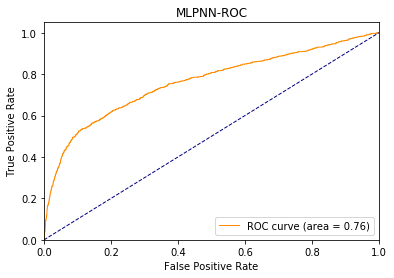

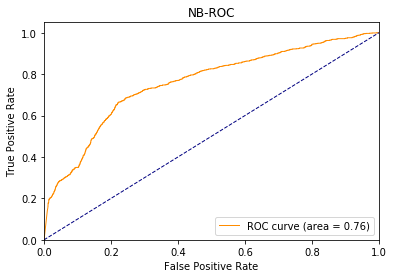

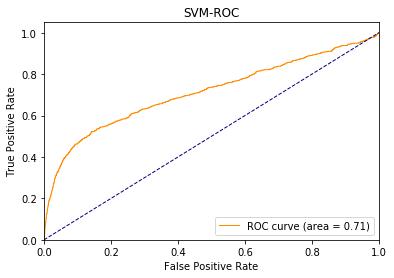

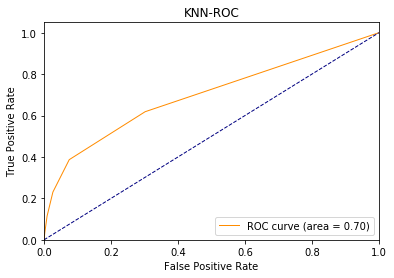

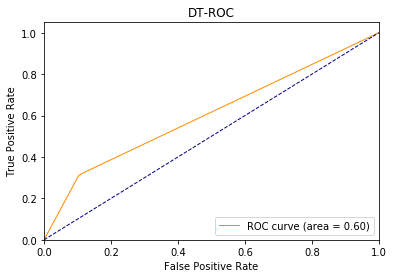

In [151]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(uY_test, ML1_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLPNN-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(uY_test, NB1_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NB-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(uY_test, SVM1_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(uY_test, KNN1_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN-ROC')
plt.legend(loc="lower right")
plt.show()

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(uY_test, DT1_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

lw = 1
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT-ROC')
plt.legend(loc="lower right")
plt.show()